<a href="https://colab.research.google.com/github/DolrajRijal/Dolraj_Rijal/blob/main/Heart_disease_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Collect the data

In [ ]:
df = pd.read_csv("/content/heart.csv")
df.head()
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Data visualizing to understand it better. And relate to all features

<BarContainer object of 1025 artists>

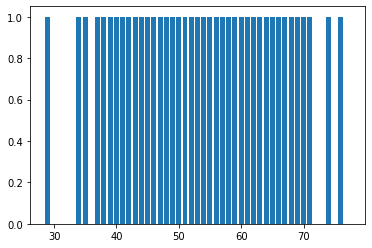

In [ ]:

age_1 = df['age']
target_1 = df['target']
plt.bar(age_1,target_1)

The probability of having heart disease between around 35 to 72 seems high when looked only from age parameter

<BarContainer object of 1025 artists>

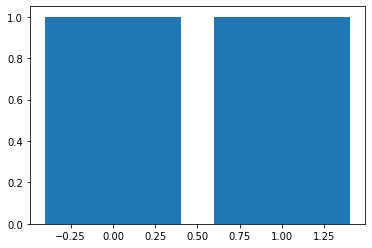

In [ ]:
sex_1 = df['sex']
plt.bar(sex_1,target_1)

equally divided among men and women

<BarContainer object of 1025 artists>

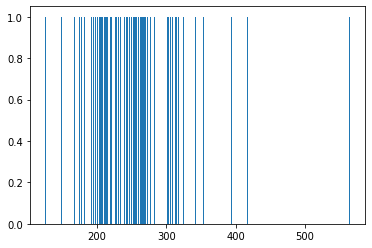

In [ ]:
chol = df['chol']
plt.bar(chol,target_1)

High probability with cholesterol above 200

Scanning data for more info

In [ ]:
df.shape
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Since this is a preprocessed data set no null values or outliers

Check 'target value' distribution

In [ ]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

Contains data with 526 heart patients and 499 non heart patients

In [ ]:
x = df.drop(columns ='target',axis = 1)
y = df['target']

 Now we need to split this data set into training and test data using train test split function from sklearnand store then in diff variables

In [ ]:
x_tr, x_tst, y_tr, y_tst = train_test_split(x,y,test_size = 0.2,stratify = y)
print(x_tr.shape,x_tst.shape)

(820, 13) (205, 13)


Now for model training, using logistic regression model from sklearn.model selection

In [ ]:
Model = LogisticRegression()
Model.fit(x_tr,y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Since data set is small

Now, model evaluation using accuracy score
Accuracy on training data:

In [ ]:
x_tr_prediction = Model.predict(x_tr)
tr_data_accuracy = accuracy_score(x_tr_prediction,y_tr)
print(tr_data_accuracy)

0.848780487804878


Now evaluating accuracy on test data

In [ ]:
x_tst_prediction = Model.predict(x_tst) 
tst_data_accuracy = accuracy_score(x_tst_prediction,y_tst)
print(tst_data_accuracy)

0.8390243902439024


Not much difference between training and test data

Now building a predictive model system

In [ ]:
input_data = (47,1,0,110,275,0,0,118,1,1.0,1,1,2)
#nput_data = input_dat.split( )
input_array = np.asarray(input_data)
input_data_shaped = input_array.reshape(1,-1)
prediction = Model.predict(input_data_shaped)
print(prediction)
if prediction:
    print('has heart disease')
else:
    print('healthy')

[0]
healthy


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
